# Assignment

This notebook includes 

- Task1: data exploration and analysis
- Task2 using machine learning approach. I would love to apply econometrics and traditional stats.Perhaps later :)

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [0]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [0]:
import requests
import pickle
import numpy as np 
import pandas as pd 

In [4]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# For modeling building and tunning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
# for evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2)-Loading data

In [7]:
df = pd.read_csv('test_data.csv')
df.head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
1,14,6.33,NaN,7,130.0,1.0,2,1,624,2
2,14,6.32,20.7,7,130.0,1.0,2,1,624,2
3,14,5.92,20.2,7,130.0,0.0,2,1,624,2
4,14,6.13,20.4,7,130.0,1.0,2,1,624,2


In [8]:
df.shape

(1784, 10)

# 3)- Exploring data

- Task1: data exploration and analysis

### 3.1)- Data type

In [9]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
dul,int64
led_type_id,int64
nutrients_id,int64
plant_id,int64
plug_density_m2,int64
substrate_id,int64
fresh_weight_plug,float64
leaf_length,float64
light_distribution_id,float64
marketable,float64


### 3.2)-Checking categorical variables

In [10]:
# Checking unique categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

There is none marked as categorical varible. I was hoping "marketable" but, it is already converted to numerical values. Still we cannot assume it to be a numerical variable. As 1 is not greater than 0.

### 3.3)-Data Description

In [11]:
df.describe()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
count,1784.000000,1596.000000,1426.000000,1784.000000,1687.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,18.784753,6.895294,19.058282,1.512892,192.193242,0.700673,2.818386,1.994395,791.690583,9.950673
std,2.834898,1.149987,2.839304,1.756919,32.994886,0.458092,0.385634,0.815561,132.569002,4.756296
min,14.000000,5.000000,10.000000,1.000000,130.000000,0.000000,2.000000,1.000000,624.000000,2.000000
25%,16.750000,6.077500,17.000000,1.000000,170.000000,0.000000,3.000000,1.000000,633.000000,4.000000
50%,18.000000,6.580000,18.400000,1.000000,170.000000,1.000000,3.000000,2.000000,849.000000,13.000000
75%,20.000000,7.380000,20.400000,1.000000,230.000000,1.000000,3.000000,3.000000,849.000000,13.000000
max,24.000000,13.760000,29.200000,8.000000,230.000000,1.000000,3.000000,3.000000,1050.000000,13.000000


It shows max and min values. There we can see mean values and we can find that some values have very high distribution considering their mean value and standard dev.

### 3.4)-Sorting

In [12]:
df.sort_values(by='leaf_length', ascending=False).head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
496,20,8.30,29.2,8,170.0,0.0,3,1,624,2
223,19,10.96,28.6,7,130.0,1.0,2,2,624,2
514,20,9.62,28.5,1,170.0,0.0,3,2,624,2
502,20,8.11,28.5,8,170.0,0.0,3,1,624,2
245,19,NaN,28.4,1,230.0,1.0,2,1,624,2


In [13]:
df.sort_values(by=['leaf_length', 'plant_id'], ascending=[True, False]).head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
227,19,5.00,10.0,7,130.0,1.0,2,2,624,2
787,17,5.82,14.6,1,230.0,0.0,3,3,947,13
598,16,5.63,14.8,1,230.0,0.0,3,3,849,13
789,17,5.74,14.8,1,230.0,0.0,3,3,947,13
785,17,5.88,14.9,1,NaN,0.0,3,3,947,13


In [14]:
df.sort_values(by=['leaf_length','marketable'], ascending=[True, False]).head()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
227,19,5.00,10.0,7,130.0,1.0,2,2,624,2
787,17,5.82,14.6,1,230.0,0.0,3,3,947,13
598,16,5.63,14.8,1,230.0,0.0,3,3,849,13
789,17,5.74,14.8,1,230.0,0.0,3,3,947,13
785,17,5.88,14.9,1,NaN,0.0,3,3,947,13


### 3.5)- Correlation

In [0]:
data_corrs = df.corr()

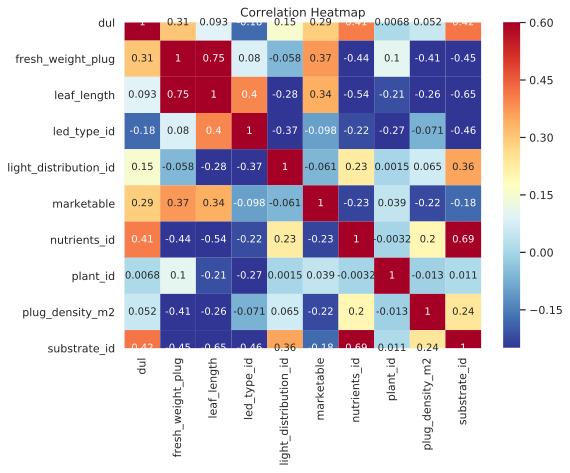

In [16]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

We will come to this when we make comparison with dependant variable

For now, we can see that fresh_weight_plug and leaf length have higher relation. Perhaps they are very close in explaining effect of each other. We can make big conclusion about it now. for now, let's keep it an assumption

### 3.6)- Missing values

In [0]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [18]:
missing_values = find_missing_values(df, columns=df.columns)
missing_values

Number of missing or NaN values for each column:


{'dul': 0,
 'fresh_weight_plug': 188,
 'leaf_length': 358,
 'led_type_id': 0,
 'light_distribution_id': 97,
 'marketable': 0,
 'nutrients_id': 0,
 'plant_id': 0,
 'plug_density_m2': 0,
 'substrate_id': 0}

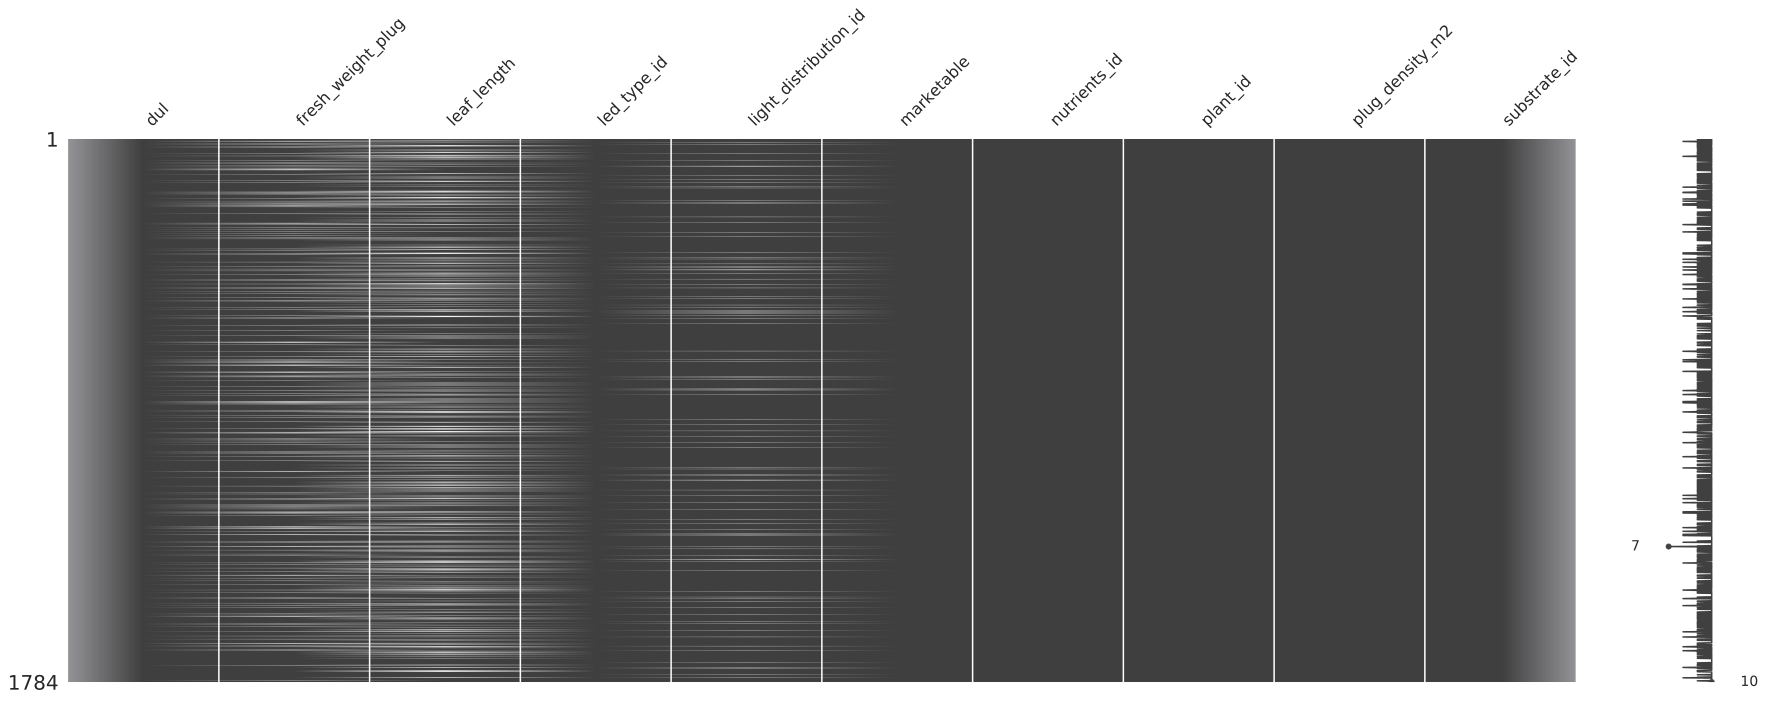

In [19]:
import missingno
missingno.matrix(df, figsize = (30,10))

We have couple of missing values there as we can see clearly. Either we remove them or we ignore them.

another option is to use imputation. We might use that.

Our dependant varibles have no missing values. So, this solution will work

### 3.6.1)- Impute missing values

In [20]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [21]:
missing_values = find_missing_values(df, columns=df.columns)
missing_values

Number of missing or NaN values for each column:


{'dul': 0,
 'fresh_weight_plug': 188,
 'leaf_length': 358,
 'led_type_id': 0,
 'light_distribution_id': 97,
 'marketable': 0,
 'nutrients_id': 0,
 'plant_id': 0,
 'plug_density_m2': 0,
 'substrate_id': 0}

In [22]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(df)

No. of fields:  1784
No. of missing fields:  3


,No. of mising Value,%age of missing Value
leaf_length,358,20.1
fresh_weight_plug,188,10.5
light_distribution_id,97,5.4


We still have missing values. Perhaps they are in form of some numerical or 0 . That's why NaN cannot detect them

In [23]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [24]:
summary_missing(df)

No. of fields:  1784
No. of missing fields:  3


,No. of mising Value,%age of missing Value
leaf_length,358,20.1
fresh_weight_plug,188,10.5
light_distribution_id,97,5.4


No change yet

In [25]:
df.loc[df.isnull().sum()]

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
188,16,7.22,20.0,1,130.0,1.0,2,3,849,4
358,16,7.09,21.8,1,170.0,1.0,3,2,849,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
97,14,NaN,17.6,1,170.0,1.0,2,3,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2
0,14,NaN,21.3,7,130.0,0.0,2,1,624,2


In [26]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.NaN, strategy='mean')
imp_mean.fit(df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [27]:
summary_missing(df)

No. of fields:  1784
No. of missing fields:  3


,No. of mising Value,%age of missing Value
leaf_length,358,20.1
fresh_weight_plug,188,10.5
light_distribution_id,97,5.4


In [0]:
df=df.fillna(df.mean())

In [29]:
summary_missing(df)

No. of fields:  1784
No. of missing fields:  0


,No. of mising Value,%age of missing Value


### 3.7)- Duplicate values

In [30]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1779    False
1780    False
1781    False
1782    False
1783    False
Length: 1784, dtype: bool

In [31]:
df.duplicated().sum()

4

 We have four duplicate values as well. Let's see what are they

In [32]:
df.loc[df.duplicated()]

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
328,16,5.990000,19.058282,8,170.0,1.0,3,1,849,2
1017,18,6.120000,17.400000,1,170.0,1.0,3,2,849,13
1228,19,6.895294,19.058282,1,170.0,1.0,3,3,849,13
1657,24,6.895294,21.600000,1,230.0,1.0,3,2,947,13


### 3.7.1- Drop duplicate values

Only features leaf_length and fresh_weight_plug have duplicate issue

In [0]:
df.drop([1017], axis=0, inplace=True)

In [34]:
df.shape

(1783, 10)

In [35]:
df.loc[df.duplicated()]

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
328,16,5.990000,19.058282,8,170.0,1.0,3,1,849,2
1228,19,6.895294,19.058282,1,170.0,1.0,3,3,849,13
1657,24,6.895294,21.600000,1,230.0,1.0,3,2,947,13


No duplicate there

### 3.8)-Finding Outliers

In [36]:
df.describe()

,dul,fresh_weight_plug,leaf_length,led_type_id,light_distribution_id,marketable,nutrients_id,plant_id,plug_density_m2,substrate_id
count,1783.000000,1783.000000,1783.000000,1783.00000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000,1783.000000
mean,18.785193,6.895729,19.059212,1.51318,192.205690,0.700505,2.818284,1.994391,791.658441,9.948962
std,2.835633,1.087821,2.538712,1.75737,32.089523,0.458165,0.385719,0.815790,132.599240,4.757082
min,14.000000,5.000000,10.000000,1.00000,130.000000,0.000000,2.000000,1.000000,624.000000,2.000000
25%,16.500000,6.140000,17.300000,1.00000,170.000000,0.000000,3.000000,1.000000,633.000000,4.000000
50%,18.000000,6.730000,19.058282,1.00000,170.000000,1.000000,3.000000,2.000000,849.000000,13.000000
75%,20.000000,7.250000,19.900000,1.00000,230.000000,1.000000,3.000000,3.000000,849.000000,13.000000
max,24.000000,13.760000,29.200000,8.00000,230.000000,1.000000,3.000000,3.000000,1050.000000,13.000000


In [37]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Check with FLAG_MOBIL variable
x = _zoom_3sigma('light_distribution_id', df, df)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: 95.94
High value: 288.47


Solution is to normalize data . We ll do it later just before modeling

# 4)- Working with dependant variable

### For task2 i.e plant ID feature

In [38]:
df.plant_id.unique()

array([1, 2, 3])

In [39]:
df.plant_id.value_counts()

1    598
2    597
3    588
Name: plant_id, dtype: int64

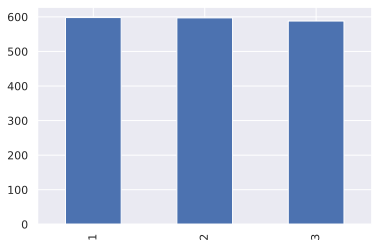

In [40]:
df['plant_id'].value_counts().plot.bar()

### For task 3 i.e marketable or not

In [41]:
df.marketable.value_counts()

1.0    1249
0.0     534
Name: marketable, dtype: int64

In [42]:
n_group = df['marketable'].value_counts()
n_group_sum = n_group.sum()

print('Marketable: {}'.format(n_group[0]))
print('Not-Marketable: {}'.format(n_group[1]))

print('percentage of Marketable: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('percentage of Not-Marketable: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

Marketable: 534
Not-Marketable: 1249
percentage of Marketable: 29.95 %
percentage of Not-Marketable: 70.05 %


There is a class imbalance as we have more not-marketable items

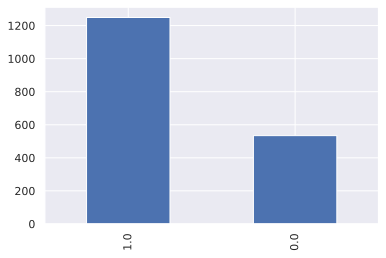

In [43]:
df['marketable'].value_counts().plot.bar()

### correlation among varibles

In [0]:
#correlations with the label feature and sort
correlations = df.corr()['marketable'].sort_values()

In [45]:
print('Most Positive Correlations:\n', correlations.tail(5))

Most Positive Correlations:
 plant_id             0.039044
dul                  0.291252
leaf_length          0.308015
fresh_weight_plug    0.350634
marketable           1.000000
Name: marketable, dtype: float64


In [46]:
print('\nMost Negative Correlations:\n', correlations.head(5))


Most Negative Correlations:
 nutrients_id            -0.228745
plug_density_m2         -0.221229
substrate_id            -0.179008
led_type_id             -0.097548
light_distribution_id   -0.059000
Name: marketable, dtype: float64


# Task 2)- Modeling with  plant_id 

In [0]:
y=df.plant_id

In [0]:
X=df.drop(['plant_id'], axis=1)

In [49]:
print(y.shape)
print(X.shape)

(1783,)
(1783, 9)


### Normalize data

In [0]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [51]:
X_scaled

array([[-1.68799571e+00, -3.99834110e-04,  8.82895125e-01, ...,
        -2.12204769e+00, -1.26475444e+00, -1.67144322e+00],
       [-1.68799571e+00, -5.20203381e-01, -3.66450535e-04, ...,
        -2.12204769e+00, -1.26475444e+00, -1.67144322e+00],
       [-1.68799571e+00, -5.29398651e-01,  6.46488528e-01, ...,
        -2.12204769e+00, -1.26475444e+00, -1.67144322e+00],
       ...,
       [ 1.83954338e+00,  1.69441874e-01,  9.48731355e-02, ...,
         4.71242943e-01,  1.17184035e+00,  6.41547387e-01],
       [ 1.83954338e+00,  3.25761465e-01,  5.54720361e-02, ...,
         4.71242943e-01,  1.17184035e+00,  6.41547387e-01],
       [ 1.83954338e+00,  3.92701289e-03, -3.38538959e-01, ...,
         4.71242943e-01,  1.17184035e+00,  6.41547387e-01]])

### Train and Test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1426, 9)
(357, 9)
(1426,)
(357,)


# Model Building

In [0]:
models = []
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVM",SVC()))

In [55]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

NB 0.39618831872353
KNN 0.6275879050526938
DT 0.5848616172559835
RF 0.6571259726189304
SVM 0.6402836600019699


Random Forest performs best on training data with 72% accuracy. 

**How about test data?**

In [56]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_test,y_test, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

NB 0.3916666666666667
KNN 0.5407936507936508
DT 0.5492857142857142
RF 0.5853968253968254
SVM 0.5519047619047619


still Random Forest is winner. So, we can say that random forest is the most optimal model out of all our choices

[Text(0, 0, 'NB'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM')]

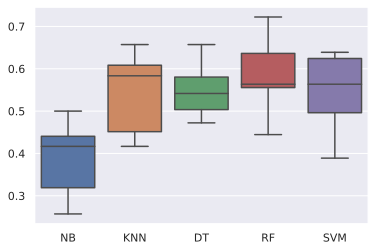

In [57]:
ax = sns.boxplot(data=results)
figsize=(16, 7)
ax.set_xticklabels(names)

### Model Tunning

Adding more estimators, and playing with parameters..........I came up with better accuracy

In [58]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
pred_rf[:5]

array([2, 2, 2, 1, 2])

In [59]:
print(accuracy_score(y_test, pred_rf))

0.6750700280112045


### confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_rf)
cm

array([[92, 13, 13],
       [14, 78, 40],
       [12, 24, 71]])

### Classification Report

In [61]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78       118
           2       0.68      0.59      0.63       132
           3       0.57      0.66      0.61       107

    accuracy                           0.68       357
   macro avg       0.68      0.68      0.68       357
weighted avg       0.68      0.68      0.68       357



# Task 3- predict if the product is marketable or not 

In next notebook